In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_boston

%matplotlib inline

In [7]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
from sklearn.model_selection import train_test_split
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import Lasso,Ridge
lasso1 = Lasso()
lasso1.fit(X_train, y_train)

ridge1 = Ridge()
ridge1.fit(X_train, y_train)

Ridge()

 <H2> MSE</H2>
<p>“Mean squared error” is perhaps the most popular metric used for regression problems. It essentially finds the average squared error between the predicted and actual values.
Let’s assume we have a regression model which predicts the price of houses in Seattle area (show them with ŷᵢ), and let’s say for each house we also have the actual price the house was sold for (denoted with yᵢ). Then the MSE can be calculated as:</p>

<img src="mse.png">
    
<p> Sometimes people use RMSE to have a metric with scale as the target values, which is essentially the square root of MSE.
Looking at house pricing prediction, RMSE essentially shows what is the average deviation in your model predicted house prices from the target values (the prices the houses are sold for).</p>

<H2> MAE </H2>
<p> Mean absolute error (or mean absolute deviation) is another metric which finds the average absolute distance between the predicted and target values. MAE is define as below: </p>

<img src="mae.png">

<p> MAE is known to be more robust to the outliers than MSE. The main reason being that in MSE by squaring the errors, the outliers (which usually have higher errors than other samples) get more attention and dominance in the final error and impacting the model parameters. </p>

In [12]:
def get_error_stats(y,y_pred,name="Test",DoPrint=True):
    MSE = mean_squared_error(y, y_pred)
    MAE = mean_absolute_error(y, y_pred)
    R2 = r2_score(y, y_pred)
    if DoPrint:
        print(F"MSE {name} {MSE}")
        print(F"MAE Score {name} {MAE}")
        print(F"R2 Score {name} {R2} \n")
    return MSE,MAE,R2

In [13]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

print("Number of non-zero Coefficients {}".format(np.sum(lasso1.coef_!=0)))
y_pred_train = lasso1.predict(X_train)
get_error_stats(y_train,y_pred_train)

y_pred_test = lasso1.predict(X_test)
get_error_stats(y_test,y_pred_test)

Number of non-zero Coefficients 5
MSE Test 28.00588554766355
MAE Score Test 3.7053473492185733
R2 Score Test 0.6555542727308025 

MSE Test 32.88937688629977
MAE Score Test 3.9945128616509225
R2 Score Test 0.6595102749400971 



(32.88937688629977, 3.9945128616509225, 0.6595102749400971)

In [15]:
MSE_train=[]
MSE_test=[]
coefs = []
n_alphas = 500
alphas = np.logspace(-10, 5, n_alphas)
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    y_pred_train = ridge.predict(X_train)
    MSE_train.append(mean_squared_error(y_train,y_pred_train))

    y_pred_test = ridge.predict(X_test)
    MSE_test.append(mean_squared_error(y_test,y_pred_test))

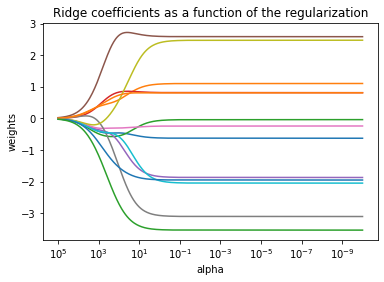

In [16]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [17]:
MSE_train=[]
MSE_test=[]
coefs = []
n_alphas = 500
alphas = np.logspace(-10, 5, n_alphas)
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    y_pred_train = lasso.predict(X_train)
    MSE_train.append(mean_squared_error(y_train,y_pred_train))

    y_pred_test = lasso.predict(X_test)
    MSE_test.append(mean_squared_error(y_test,y_pred_test))

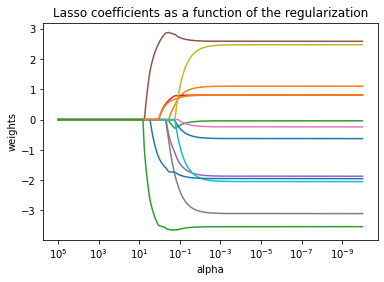

In [18]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [19]:
MSE_train_Ridge=[]
MSE_test_Ridge=[]
MSE_train_Lasso=[]
MSE_test_Lasso=[]

n_alphas = 100
alphas = np.logspace(-1, 2, n_alphas)
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    
    y_pred_train = ridge.predict(X_train)
    MSE_train_Ridge.append(r2_score(y_train,y_pred_train))
    y_pred_test = ridge.predict(X_test)
    MSE_test_Ridge.append(r2_score(y_test,y_pred_test))

<AxesSubplot:>

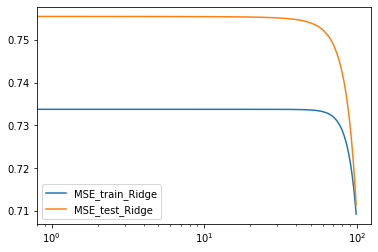

In [20]:
Results = pd.DataFrame({'MSE_train_Ridge':MSE_train_Ridge,"MSE_test_Ridge":MSE_test_Ridge})
Results.plot(legend=True,logx=True)

In [21]:
n_alphas = 100
alphas = np.logspace(-1, 2, n_alphas)
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    y_pred_train = lasso.predict(X_train)
    MSE_train_Lasso.append(mean_squared_error(y_train,y_pred_train))

    y_pred_test = lasso.predict(X_test)
    MSE_test_Lasso.append(mean_squared_error(y_test,y_pred_test))

<AxesSubplot:>

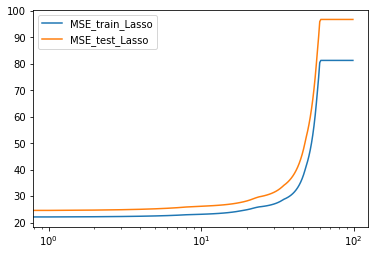

In [22]:
Results = pd.DataFrame({'MSE_train_Lasso':MSE_train_Lasso,"MSE_test_Lasso":MSE_test_Lasso})
Results.plot(legend=True,logx=True)